# *Exploring TTC Streetcar Delays and Forecasting Delays*

- Created on: November, 2023
- Created by: Jessica Seo
---------

## 🚂 Baseline Modeling

## Notebook Contents

- [Introduction](#introID)
- [Categorical Feature Definiton](#categoricalID)
- [Data Spliting](#splitID)
- [Data Loading](#dataID)
- [Logistic Regression Model](#logisticID)
- [Data Saving](#savingID)
    - Hyperparameter tuning
    - Model Evaluation
- [Summary](#summaryID)
-------

## <a id='intro'> Introduction </a>

In this notebook, we will split the dataset into train and test sets and run a baseline model to assess how well it can predict streetcar delays.

---

### <a id='categoricalID'> Categorical Feature Definition </a>

<table>
   <tr>
    <th style="text-align: left; background: lightgrey">Summer/Winter_PT</th>
    <th style="text-align: left; background: lightgrey">Definition</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>0</code> </td>
    <td style="text-align: left">No, There wasn't a Temperature warning</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>1</code></td>
    <td style="text-align: left">Yes, There was a Temperature warning</td>
    <tr>
    <th style="text-align: left; background: lightgrey">Day</th>
    <th style="text-align: left; background: lightgrey">Definition</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>0</code> </td>
    <td style="text-align: left">Monday</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>1</code></td>
    <td style="text-align: left">Tuesday</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>2</code></td>
    <td style="text-align: left">Wednesday</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>3</code></td>
    <td style="text-align: left">Thursday</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>4</code></td>
    <td style="text-align: left">Friady</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>5</code></td>
    <td style="text-align: left">Saturday</td>
  </tr>
    <tr>
    <td style="text-align: left"><code>6</code></td>
    <td style="text-align: left">Sunday</td>
  </tr>
    <tr>
    <th style="text-align: left; background: lightgrey">Min_Delay</th>
    <th style="text-align: left; background: lightgrey">Definition</th>
  </tr>
  <tr>
    <td style="text-align: left"><code>0(Slight Delay)</code></td>
    <td style="text-align: left">0 Minute to 6 Minutes Delay</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>1(Moderate Delay)</code></td>
    <td style="text-align: left">7 Minutes to 9 Minutes Delay</td>
  </tr>
  <tr>
  <tr>
    <td style="text-align: left"><code>2(Severe Delay)</code></td>
    <td style="text-align: left">Greater than 10 Minutes Delay</td>
  </tr>
</table>


----
## <a id='dataID'> Data Loading</a>

In [1]:
#importing necessary python library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading merged datasest
df=pd.read_csv('Capstone_clean_model.csv')
df

,Temperature,Precipitation,Summer_PT,Winter_PT,Day,Line,Min_Delay,Year,Month,Date,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
0,-2.0,0.0,False,True,4,501,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
1,-2.0,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,1,0,0,0,0
2,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.4,0.0,False,True,4,504,2,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0.4,0.0,False,False,4,506,2,2021,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41913,16.6,0.0,False,False,5,511,2,2023,9,30,...,0,0,0,0,0,0,0,0,0,0
41914,16.9,0.0,False,False,5,505,2,2023,9,30,...,0,0,0,0,0,0,0,0,1,0
41915,16.9,0.0,False,False,5,513,2,2023,9,30,...,0,0,0,0,0,1,0,0,0,0
41916,16.9,0.0,False,False,5,501,2,2023,9,30,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Checking columns
df.dtypes

Temperature                          float64
Precipitation                        float64
Summer_PT                               bool
Winter_PT                               bool
Day                                    int64
Line                                   int64
Min_Delay                              int64
Year                                   int64
Month                                  int64
Date                                   int64
Hour                                   int64
Minute                                 int64
Weather_Cloudy                         int64
Weather_Fog                            int64
Weather_Freezing Rain                  int64
Weather_Haze                           int64
Weather_Heavy Rain                     int64
Weather_Heavy Snow                     int64
Weather_Moderate Rain                  int64
Weather_Moderate Snow                  int64
Weather_Rain                           int64
Weather_Snow                           int64
Weather_Th

In [6]:
def basic_exploration(df):
    '''
    Basic EDA function
    '''
    print(f"Rows: {df.shape[0]}")
    print(f"Columns: {df.shape[1]}")
    print(f"Missing values: {df.isna().sum().sum()}")
    print(f"Duplicated rows: {df.duplicated().sum()}")

basic_exploration(df)

Rows: 41918
Columns: 39
Missing values: 0
Duplicated rows: 294


The row count and column count matches the previous notebook.

In [7]:
#checking the proportion of duplicated rows 
df.duplicated().sum()/df.shape[0]*100

0.7013693401402739

In [8]:
#looking at the duplicates
df.loc[df.duplicated(), :]

,Temperature,Precipitation,Summer_PT,Winter_PT,Day,Line,Min_Delay,Year,Month,Date,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
24,2.2,0.0,False,False,4,511,0,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
376,0.4,0.0,False,False,0,506,0,2021,1,11,...,0,0,0,0,0,1,0,0,0,0
1440,-7.7,0.8,False,True,1,504,0,2021,2,16,...,0,0,0,0,0,0,0,0,0,0
1647,-3.6,0.0,False,True,6,510,0,2021,2,21,...,0,0,0,0,0,0,0,0,0,0
1751,2.2,0.0,False,False,1,506,0,2021,2,23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40479,19.3,0.0,False,False,5,503,1,2023,8,19,...,0,0,0,0,0,1,0,0,0,0
40938,19.7,0.0,False,False,4,501,2,2023,9,1,...,0,0,0,0,0,1,0,0,0,0
41244,20.1,0.0,True,False,0,501,1,2023,9,11,...,0,0,0,0,0,1,0,0,0,0
41316,14.2,0.0,False,False,2,507,2,2023,9,13,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#checking few examples of duplicates
df[(df.Temperature==2.2)&(df.Line ==511)&(df.Year ==2021)&(df.Day ==4)&(df.Date ==1)]

,Temperature,Precipitation,Summer_PT,Winter_PT,Day,Line,Min_Delay,Year,Month,Date,...,Incident_Late,Incident_Late Entering Service,Incident_Late Leaving Garage,Incident_Management,Incident_Mechanical,Incident_Operations,Incident_Overhead,Incident_Rail/Switches,Incident_Security,Incident_Utilized Off Route
20,2.2,0.0,False,False,4,511,0,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
21,2.2,0.0,False,False,4,511,0,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
22,2.2,0.0,False,False,4,511,0,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
23,2.2,0.0,False,False,4,511,0,2021,1,1,...,0,0,0,0,0,0,0,0,0,0
24,2.2,0.0,False,False,4,511,0,2021,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#drop duplicated to only keep unique values
df = df.drop_duplicates()

In [11]:
#checking
basic_exploration(df)

Rows: 41624
Columns: 39
Missing values: 0
Duplicated rows: 0


In [12]:
nums = ['Temperature','Summer_PT','Winter_PT','Precipitation','Line','Min_Delay','Year','Month','Hour']

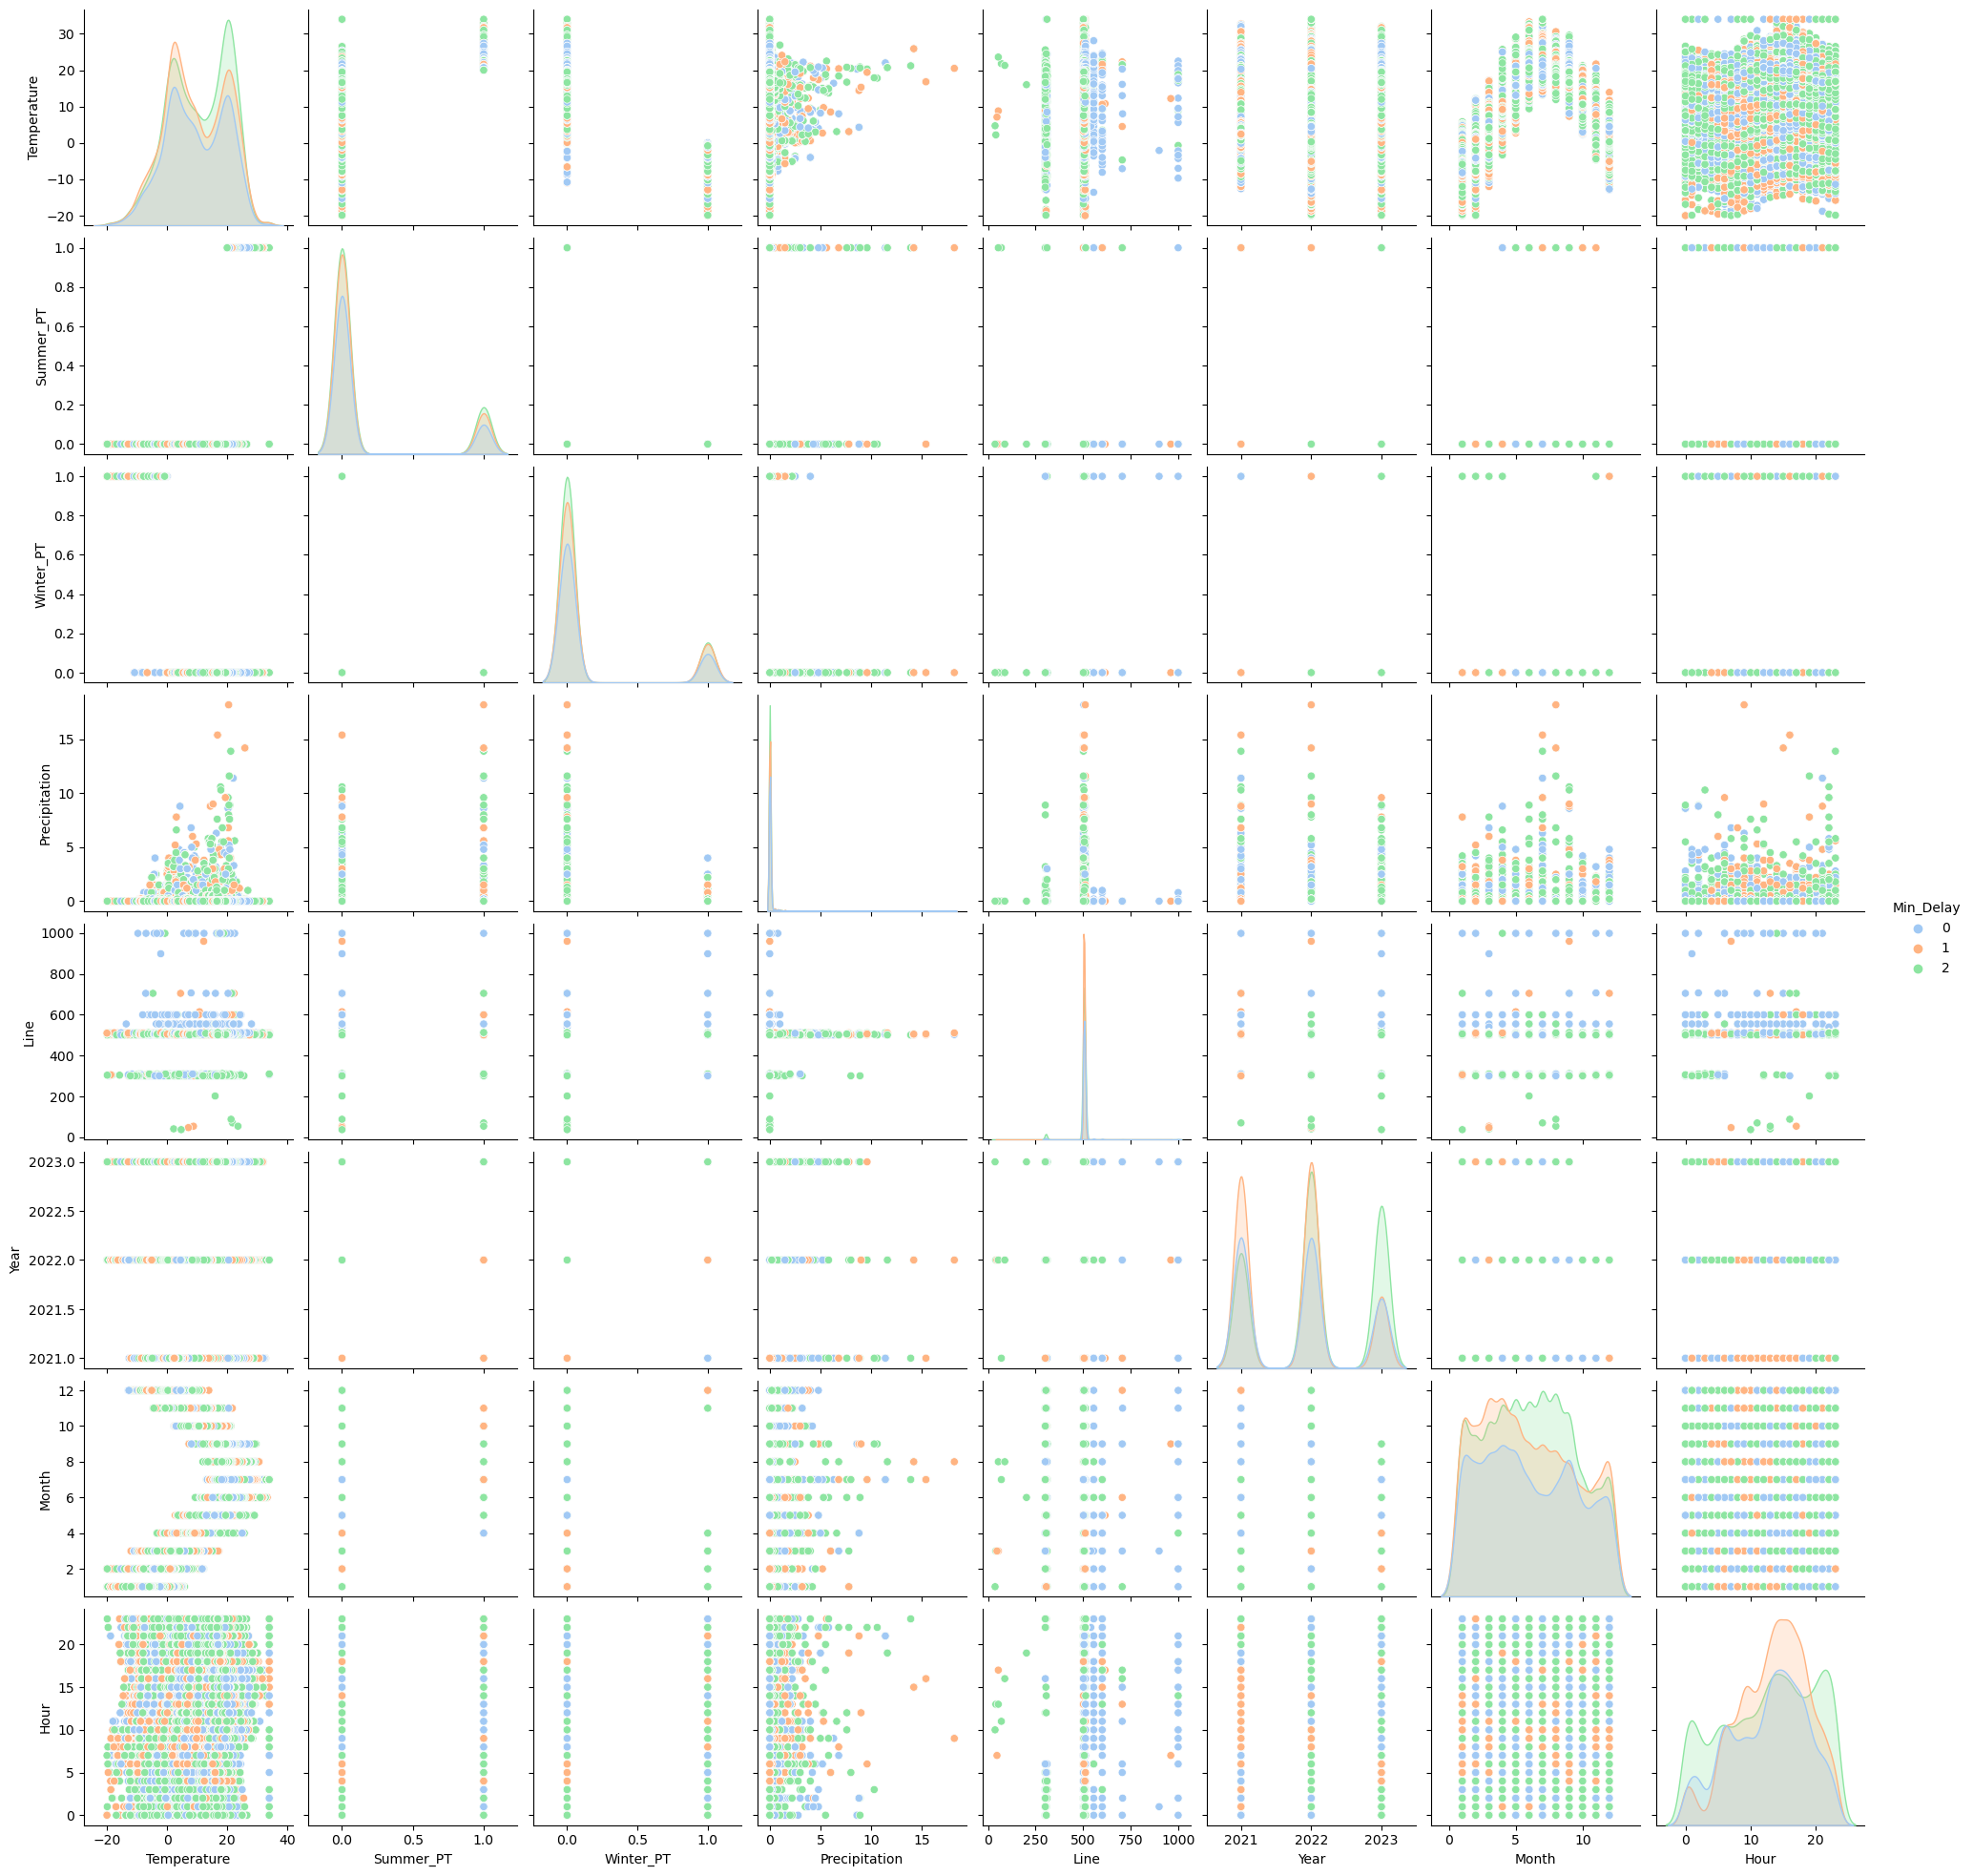

In [13]:
#looking into feature distribution with clean data
sns.pairplot(df[nums], hue='Min_Delay', palette='pastel')

Interesting Observations:

- A quick glance tell us that green dots have the most delayed frequency.
- Streetcars tend to face **severe delays when precipitation is below 13mm per hour**. On heavy rain or snowy days with **precipitation exceeding 15mm, delays typically range from 7 to 9 minutes**.
- Lines starting with '5' are seems to be the most active, experiencing occasional slight delays throughout the day.
- **Minor delays** are more likely during the first two quarters of the year **when it's cold**. As the **city warms up, severe delays** become more frequent.
- The data shows that the period between 10 am and 8 pm experiences the highest frequency of delays, with a concentration of **moderate delays occurring during the rush hour between 3 pm and 6 pm.**

___
## <a id='splitID'> Data Spliting </a>

In [14]:
#importing modelling library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [15]:
#Defininig variables
#70% train size, 30% test size

#df = df.sample(frac = 1, random_state=42)
X=df.drop('Min_Delay', axis=1)
y=df['Min_Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 ,random_state=1)

In [16]:
#checking the shape 
print(f'This is X_train shape: {X_train.shape}')
print(f'This is y_train shape: {y_train.shape}')

This is X_train shape: (29136, 38)
This is y_train shape: (29136,)


In [17]:
#checking the shape 
print(f'This is X_test shape: {X_test.shape}')
print(f'This is y_test shape: {y_test.shape}')

This is X_test shape: (12488, 38)
This is y_test shape: (12488,)


----
##  <a id='savingID'>Data Saving</a>

In [ ]:
#saving the split dataframe to use later.
df.to_csv('train_test_model.csv', index=False)

---
## <a Id='logisticID'> Logistic Regression Model </a>

Logistic regression is used when a target feature is categorical. In our case, where the target variable has three classes (0-slight delay, 1-moderate delay, 2-severe delay), we will use ordinal logistic regression. After spliting the dataset into training (70%) and testing (30%), we will find the optimal parameters to find the best predictive accuracy.

In [19]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

### Hyperparameter Tuning

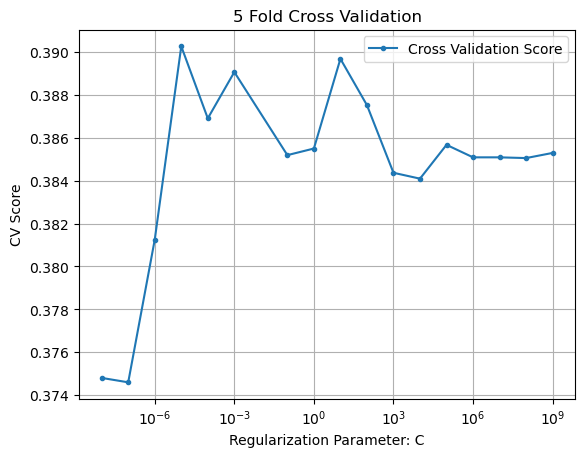

   The best model has C =  1e-05


In [25]:
#Wide range, 5 fold cross validation

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=45)
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 5))
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('CV Score')
plt.title('5 Fold Cross Validation')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("   The best model has C = ",C_range[which_max])

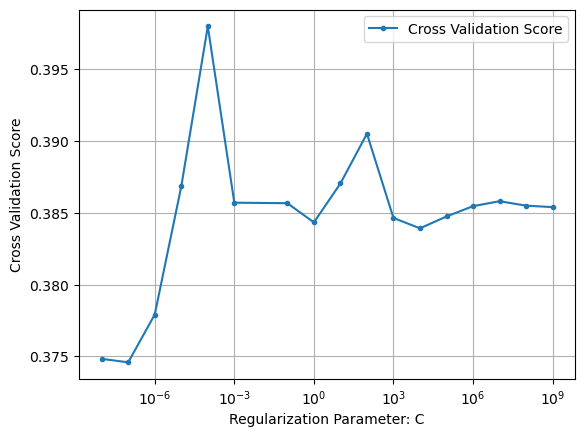

  The best model has C =  0.0001


In [26]:
#Wide range, 2 fold cross validation

cross_validation_scores = []

C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,.1,\
                1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(C=c,random_state=45)
    cv_score = np.mean(cross_val_score(LR_model, X_train, y_train, cv = 2))
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("  The best model has C = ",C_range[which_max])

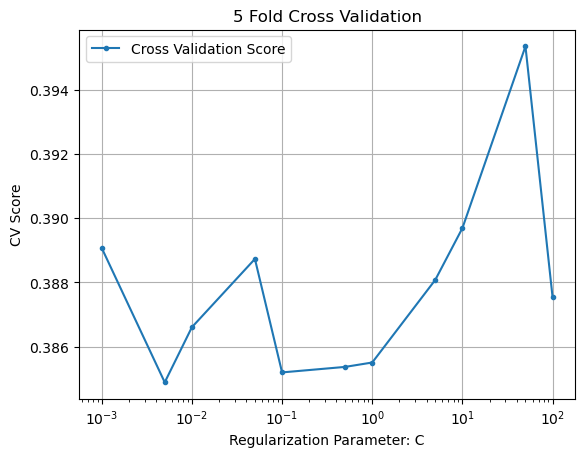

  The best model has C =  50


In [27]:
#Smaller range, 5 fold cross validation

cross_validation_scores = []
C_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

# Find the index of the best C value
plt.figure()
plt.plot(C_values, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('CV Score')
plt.title('5 Fold Cross Validation')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("  The best model has C = ",C_values[which_max])

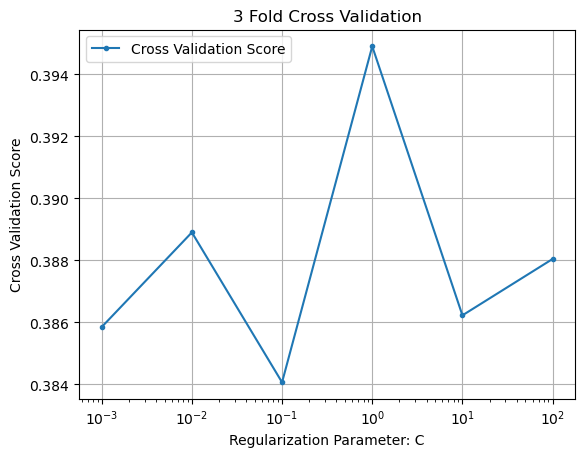

   The best model has C =  1


In [28]:
#Smaller range, 3 fold cross validation

cross_validation_scores = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=3)
    cross_validation_scores.append(scores.mean())

# Find the index of the best C value
plt.figure()
plt.plot(C_values, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.title('3 Fold Cross Validation')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("   The best model has C = ",C_values[which_max])

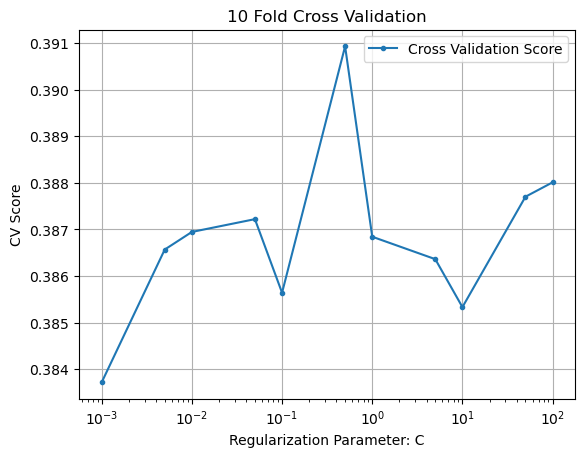

  The best model has C =  0.5


In [29]:
#Smaller range, 10 fold cross validation

cross_validation_scores = []
C_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=10)
    cross_validation_scores.append(scores.mean())

# Find the index of the best C value
plt.figure()
plt.plot(C_values, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('CV Score')
plt.title('10 Fold Cross Validation')
plt.grid()
plt.show();

which_max = np.array(cross_validation_scores).argmax()

print("  The best model has C = ",C_values[which_max])

We experimented with various plots, adjusting cross-validation numbers, but the models showed inconsistent optimal C values. Let's continue to run the logistic regression baseline model using the default C value instead.

In [33]:
#logression model with default C value

#Instantiate the model
train_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1)

#Fit the model
train_model.fit(X_train, y_train)

#Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#scoring
train_accuracy = train_model.score(X_train_scaled, y_train)
test_accuracy = train_model.score(X_test_scaled, y_test)

print(f"Train set accuracy : {train_accuracy}")
print(f"Test set accuracy: {test_accuracy}")

Train set accuracy : 0.449890170236134
Test set accuracy: 0.43786034593209483


In our exploration to identify the optimal regularization parameter (C), we experimented with a broader range and different numbers of cross-validation folds. However, the **C value resulted highly inconsistent**. Further investigation is required to understand this. Despite the fluctuating C values, the consistent performance between the training and test sets suggests that **our model is not overfitting**. As this is our baseline model, let's move on to examine recall and precision scores to discover additional insights.

,Predicted-Slight Delay,Predicted-Moderate Delay,Predicted-Severe Delay
True-Slight Delay,43,1290,2116
True-Moderate Delay,41,1801,2536
True-Severe Delay,64,1612,2985


None


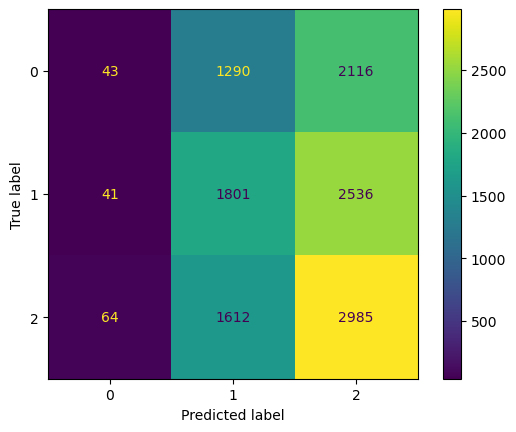

In [40]:
#Confusion Matrix
#Get class predictions
y_pred = train_model.predict(X_test)

# Generate confusion matrix
df_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
df = pd.DataFrame(
    df_matrix, 
    columns = ["Predicted-Slight Delay","Predicted-Moderate Delay", "Predicted-Severe Delay"],
    index = ["True-Slight Delay","True-Moderate Delay", "True-Severe Delay"]
)

print(display(df))

# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(train_model, X_test, y_test);

In [34]:
#check how the trained model is predicted
from sklearn.metrics import classification_report

# Getting predictions per class
y_pred = train_model.predict(X_test_scaled)

classification_report = classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.30      0.26      0.28      3449
           1       0.44      0.50      0.47      4378
           2       0.52      0.51      0.52      4661

    accuracy                           0.44     12488
   macro avg       0.42      0.42      0.42     12488
weighted avg       0.43      0.44      0.43     12488



The model incorrectly **predicted 30% of instances labeled as slight delay, 44% as moderate delay, and 52% as severe delay**. These are the precision scores for each class, indicating the proportion of **instances predicted as positive that were actually negative.**

On the other hand, the model correctly identified **26% of actual slight delay instances, 50% of actual moderate delays, and 51% of actual severe delays.** These are the recall scores for each class, indicating the proportion of actual positive instances that were correctly predicted.

The model has slightly higher precision and higher recall for severe delays.

---- 
## <a Id='summaryID'> Summary<a>

The logistic regression model did not perform optimally. In the next notebook, we will delve deeper into the data by building advanced machine learning models.